# Strang matrix

In [ ]:
N = 5
A = Matrix{Int64}(undef, N, N)

for row in 1:N, col in 1:N
    if row == col
        A[row, col] = -2
    elseif abs(row - col) < 2
        A[row, col] = 1
    else
        A[row, col] = 0
    end
    
    # more Julian way to do this - pretty sweet, huh?
    # abs(i-j) <= 1 && (A[i,j] += 1)
    # i == j && (A[i,j] -= 3)
end
A

# Factorial Problem

In [ ]:
# using Traceur

function my_factorial(n::Union{Int64, BigInt}) # the union part not really needed
    fac = one(n)
    for i in 1:n
        fac *= i
    end
    fac
end

@time my_factorial(big(200000)) # holy shit, this runs fast af hahah

# Binomial

In [ ]:
function binomial_rv(n::Int64, p::Float64)
    k = zero(1)
    n = convert(Int64, n)
    for i in 1:n
        rand() > p && (k += 1)
    end
    k / n
end

binomial_rv(1000, 0.5)

In [ ]:
# using Traceur
@trace(binomial_rv(1000, 0.5), modules=[Main]) 
# not yet sure what the output of this is, am I doing something wrong
# with type-stability?                        

# Monte Carlo π

In [ ]:
#using Distributions

function estimate_π(n::Int64)
    p = zero(1)
    #points = rand(Uniform(-1,1), 2, n)
    x = rand(Uniform(-1,1), 1, n)
    y = rand(Uniform(-1,1), 1, n)
    for i in 1:n
        #(points[1,i]^2 + points[2,i]^2) <= 1 && (p += 1)
        (x[i]^2 + y[i]^2) <= 1 && (p += 1) # the prob. that the points x,y 
                                           # are in the circle (x^2 + y^2 <= 1) is π/4
    end
    (p / n) * 4 # p / n -> since we counted the times the condition was met, we divide by n
                # and multiply by 4 to get π
end

estimate_π(100000)

# Timeseries Generation problem

In [ ]:
# using Plots

α = [0;0.5;0.9]
T = 200

# x = zeros(T, length(α))
# ϵ = randn(T, length(α))

# for i in 2:T, j in 1:3
#     x[i, j] = α[j] * x[i-1, j] + ϵ[i, j]
# end
# plot(x, label = reshape(α, 1, 3)) # missing a 0 label, easily solved with formatting it

gr()

series = []
labels = []

for alpha in α
    x = zeros(T+1)
    x[1] = 0.0
    for t in 1:T
        x[t+1] = alpha * x[t] + randn()
    end
    push!(series, x)
    push!(labels, "alpha = $alpha")
end
plot(series, label=reshape(labels,1,length(labels)), lw = 3)

# Logistic map Problem

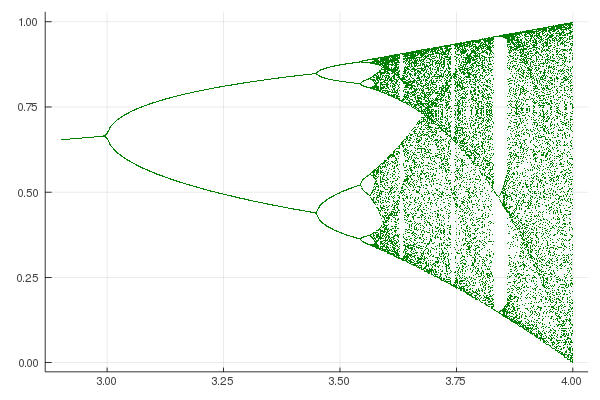

In [40]:
r = 2.9:0.001:4
numAttract = 50
steady = ones(length(r), 1) * .25 # intialize array that will contain series

for i in 1:400
    @. steady = r * steady * (1-steady) # broadcast the series to steady, only last column to be used
end

x = zeros(length(steady), numAttract) # empty array(matrix) which will be filled with 
                                      # numAttract following values in the series
x[:, 1] = steady # take the stabilized column

@inbounds for i in 2:numAttract
    @. x[:,i] = r * x[:, i-1] * (1 - x[:, i-1]) # continue the series for numAttract times and broadcast to x
end

gr(fmt=:png)
plot(collect(r), x, seriestype=:scatter, markersize = 0.002, legend = false, color=:green)